# SCC0270 - Neural Networks and Deep Learning
## Traffic Sign Image Classification

## 1.Introduction

Accurate and fast identification of traffic signs is a task of great importance for advanced driver assistance systems and autonomous vehicles. The ability of a vehicle to effectively recognize and interpret traffic signs significantly contributes to road safety and efficiency, preventing accidents and assisting navigation.

In this project, we address the task of traffic sign classification by developing and comparing different architectures for automatic classification. We explore traditional methods, such as Support Vector Machines (SVM), as well as Convolutional Neural Networks (CNNs), which have proven to be extremely effective in pattern recognition tasks in images, and transfer learning algorithms.

By comparing traditional and modern methods, we provide insights into the advantages and limitations of each approach.

The project is structured as follows:

- Data Description: Details the dataset used, including its structure and preprocessing.
- Baseline: Presents the SVM baseline method and its results.
- Convolutional Neural Networks (CNN): Describes the CNN architectures implemented, including a basic CNN and a deeper one, along with their results.
- Transfer Learning: Describes the architecture of the algorithm using the deep convolutional neural network model VGG16 and its results.
- Conclusion: A summary of the results obtained and discussions about the most effective approaches.
- References: Cites the references used throughout the project.

## 2.Data Description

<img align="right" width="350" height="200" src="https://i.pinimg.com/originals/ba/b9/c7/bab9c7ee9a2adf29057a1d1214244cf0.jpg">

For this traffic sign image classification project, we used the **Traffic Signs Preprocessed**, available on Kaggle. The data is already preprocessed and divided into training, validation, and test sets.

Before preprocessing, the training dataset was balanced, making the examples in each class equal. There are 43 initial classes in the training dataset, and after balancing, transformed images were added, altering brightness and rotation of the original dataset, such that the training dataset grew to 86,989 examples. [3]

The data used is in grayscale, and follows the format:

- x_train: (86989, 1, 32, 32)

- y_train: (86989,)

- x_validation: (4410, 1, 32, 32)

- y_validation: (4410,)

- x_test: (12630, 1, 32, 32)

- y_test: (12630,)




## 3.Baseline

For the baseline case, we used the Support Vector Machine (SVM), which is independent of neural networks.

SVM is a supervised machine learning algorithm that involves plotting each data point in an n-dimensional space and performing classification through hyperplanes. Different types of kernels can be used within the algorithm, such as linear, RBF, etc. These kernels are used to transform the data in order to map it to a higher-dimensional vector space where it becomes easier to separate the classes using hyperplanes. [4]


### 3.1.Support Vector Machine (SVM)

In this project, we decided to use the radial basis function (RBF) kernel. Essentially, it measures the similarity between two data points in infinite dimensions and selects the class to which a point should belong by choosing the one that occurs most frequently. In addition to this kernel, others were tested (linear and poly), but due to the long processing time, we decided to include only the one that achieved the best performance using GridSearch. It will be built with 3-folds. [5]

In [ ]:
import pickle
with open("/content/drive/My Drive/Trabalho_redesneurais/data8.pickle",'rb') as f:
  data = pickle.load(f)  # dictionary type

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load the training, validation, and test data
X_train = np.array(data['x_train'])
y_train = np.array(data['y_train'])
X_validation = np.array(data['x_validation'])
y_validation = np.array(data['y_validation'])
X_test = np.array(data['x_test'])
y_test = np.array(data['y_test'])

# Check the shape of the data
print("Shape of the training data:", X_train.shape)
print("Shape of the validation data:", X_validation.shape)
print("Shape of the test data:", X_test.shape)

# Reformat the data to have the correct shape **We use np.transpose to change the order of the data dimensions
# from (num_samples, 1, height, width) to (num_samples, height, width, 1). This places the channel dimension in the expected position for Keras/TensorFlow.
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_validation = np.transpose(X_validation, (0, 2, 3, 1))
X_test = np.transpose(X_test, (0, 2, 3, 1))

# Print the new shape of the data to ensure the reformatting was done correctly.
print("New shape of the training data:", X_train.shape)
print("New shape of the validation data:", X_validation.shape)
print("New shape of the test data:", X_test.shape)

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_validation = X_validation.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define the parameters to explore in GridSearch
parameters = {'kernel':  ['rbf']}

# Create and train the SVM model with GridSearch
svm_model_grid = GridSearchCV(SVC(), parameters, cv=3, verbose=3)
svm_model_grid.fit(X_train.reshape(-1, 32*32), y_train)

# Access the best model found
best_model = svm_model_grid.best_estimator_

# Print the best set of parameters
print(f"Best parameters: {svm_model_grid.best_params_}")

Forma dos dados de treino: (86989, 1, 32, 32)
Forma dos dados de validação: (4410, 1, 32, 32)
Forma dos dados de teste: (12630, 1, 32, 32)
Nova forma dos dados de treino: (86989, 32, 32, 1)
Nova forma dos dados de validação: (4410, 32, 32, 1)
Nova forma dos dados de teste: (12630, 32, 32, 1)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ........................kernel=rbf;, score=0.965 total time=30.7min
[CV 2/3] END ........................kernel=rbf;, score=0.965 total time=27.4min
[CV 3/3] END ........................kernel=rbf;, score=0.967 total time=26.0min
Melhores parâmetros: {'kernel': 'rbf'}


In [ ]:
y_pred_train = best_model.predict(X_train.reshape(-1, 32*32))
# Evaluating the model's accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of the best model on training data: {accuracy_train:.2f}")
# Make predictions on the test set with the best model
y_pred_test = best_model.predict(X_test.reshape(-1, 32*32))
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of the best model on test data: {accuracy_test:.2f}")

Acurácia do melhor modelo no treinamento: 0.99
Acurácia do melhor modelo: 0.83


Note that there is a significant drop in accuracy from training to testing. This could be addressed by testing other hyperparameter values, among other techniques, but since the focus of the project is on neural networks, we decided not to pursue this path. Even with a generic algorithm like SVM, a reasonably good result was achieved for our dataset. The outcome was a pleasant surprise.

## 4.CNN

A Convolutional Neural Network (CNN), also known as ConvNet, is a specialized type of deep learning algorithm designed primarily for tasks that require object recognition, including classification, detection, and segmentation of images. CNNs are used in various practical scenarios, such as autonomous vehicles, security camera systems, and others. [2]

### 4.1. Basic CNN with Few Layers

This simple model serves as a starting point to observe the initial performance and features an architecture that is easy to implement and quick to train.

The input layer is defined in the first convolutional layer with the input_shape definition. The Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]) layer receives input images in the format (height, width, channels). For pre-processed images, the format is (32, 32, 1), where 1 represents the grayscale.

The convolutional layers are responsible for extracting features from the images using filters, and each layer is followed by a pooling layer to reduce spatial dimensionality.

The first convolutional layer, Conv2D(32, (3, 3), activation='relu'), with 32 filters and a 3x3 window, is followed by a MaxPooling2D((2, 2)) pooling layer that reduces the dimension by half. The second convolutional layer, Conv2D(64, (3, 3), activation='relu'), with 64 filters and a 3x3 window, is followed by another pooling layer. The third convolutional layer, Conv2D(64, (3, 3), activation='relu'), presents 64 filters and a 3x3 window.

After the convolutional and pooling layers, the data is flattened into a one-dimensional vector using the Flatten function and passed to one or more dense layers. Dense(64, activation='relu') is a fully connected layer with 64 neurons and ReLU activation function.

Finally, the output layer is defined to perform the classification with the softmax activation function. Dense(num_classes, activation='softmax') is the output layer with one neuron per class and the softmax activation function to produce probabilities.

The model is compiled and trained using the categorical_crossentropy loss function and the Adam optimizer. The Adam optimizer is a stochastic gradient descent method based on adaptive estimates of first- and second-order moments. [6]

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle
import os
import cv2

In [ ]:
# Opening file for reading in binary mode
with open('/content/data8.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

In [ ]:
# Inspecting the dictionary keys
print("Chaves do dicionário:", data.keys())

Chaves do dicionário: dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test'])


Forma dos dados de treino: (86989, 1, 32, 32)
Forma dos dados de validação: (4410, 1, 32, 32)
Forma dos dados de teste: (12630, 1, 32, 32)
Nova forma dos dados de treino: (86989, 32, 32, 1)
Nova forma dos dados de validação: (4410, 32, 32, 1)
Nova forma dos dados de teste: (12630, 32, 32, 1)
Epoch 1/20
1360/1360 [==============================] - 8s 5ms/step - loss: 1.5363 - accuracy: 0.5987 - val_loss: 0.7511 - val_accuracy: 0.7787
Epoch 2/20
1360/1360 [==============================] - 7s 5ms/step - loss: 0.5483 - accuracy: 0.8606 - val_loss: 0.5043 - val_accuracy: 0.8562
Epoch 3/20
1360/1360 [==============================] - 6s 5ms/step - loss: 0.3544 - accuracy: 0.9092 - val_loss: 0.4733 - val_accuracy: 0.8755
Epoch 4/20
1360/1360 [==============================] - 7s 5ms/step - loss: 0.2604 - accuracy: 0.9320 - val_loss: 0.4191 - val_accuracy: 0.8925
Epoch 5/20
1360/1360 [==============================] - 7s 5ms/step - loss: 0.2036 - accuracy: 0.9473 - val_loss: 0.4328 - val_accu

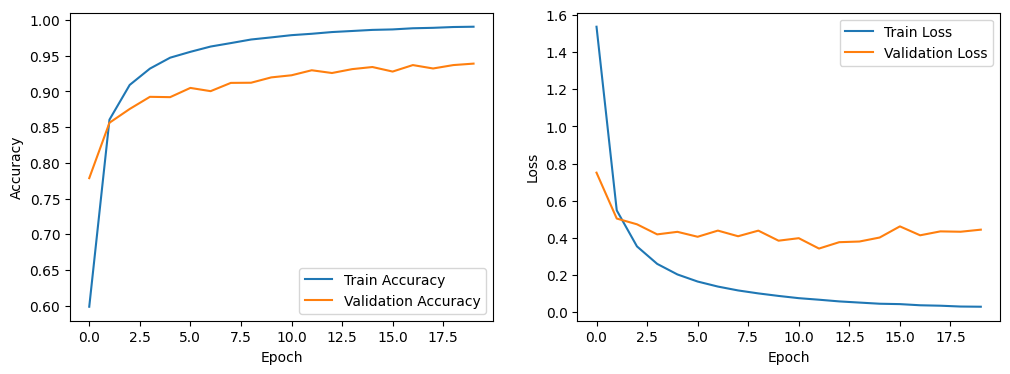

In [ ]:
# Load training, validation, and test data
X_train = np.array(data['x_train'])
y_train = np.array(data['y_train'])
X_validation = np.array(data['x_validation'])
y_validation = np.array(data['y_validation'])
X_test = np.array(data['x_test'])
y_test = np.array(data['y_test'])

# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_validation.shape)
print("Test data shape:", X_test.shape)

# Reformat the data to have the correct shape **We use np.transpose to change the order of the data dimensions
# from (num_samples, 1, height, width) to (num_samples, height, width, 1). This places the channel dimension in the expected position by Keras/TensorFlow.
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_validation = np.transpose(X_validation, (0, 2, 3, 1))
X_test = np.transpose(X_test, (0, 2, 3, 1))

# Print the new shape of the data to ensure that the reformatting was done correctly.
print("New training data shape:", X_train.shape)
print("New validation data shape:", X_validation.shape)
print("New test data shape:", X_test.shape)

# Pre-process the data
X_train = X_train.astype('float32') / 255.0
X_validation = X_validation.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_validation = to_categorical(y_validation, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_validation, y_validation))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot the accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Note that the graphs comparing accuracy between the training and test sets do not indicate the presence of overfitting in the model. The same is observed in the loss curves for both training and test. Overall, the model demonstrates good performance. Additionally, the accuracy achieved on the test set was 90%, surpassing the results of the algorithms presented so far. Although the CNN is not very complex, it has yielded good results. To achieve even better performance, we will implement a more complex CNN with the goal of further improving the model's performance.

### 4.2. CNN with a Deeper Architecture

This second architecture is for a more robust CNN. We added more convolutional and pooling layers to increase the model's depth and enable the learning of more complex features, where each convolutional layer is followed by a batch normalization layer, BatchNormalization, which helps speed up training and improve model stability. We also added Dropout layers to reduce overfitting.

We can place the architectures of the two CNNs side by side for comparison.

**Architecture of the Basic CNN:**

model = Sequential()\
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))\
model.add(MaxPooling2D((2, 2)))\
model.add(Conv2D(64, (3, 3), activation='relu'))\
model.add(MaxPooling2D((2, 2)))\
model.add(Conv2D(64, (3, 3), activation='relu'))\
model.add(Flatten())\
model.add(Dense(64, activation='relu'))\
model.add(Dense(num_classes, activation='softmax'))\

**Architecture of the More Robust CNN:**

model = Sequential()\
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))\
model.add(BatchNormalization())\
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))\
model.add(BatchNormalization())\
model.add(MaxPooling2D((2, 2)))\
model.add(Dropout(0.25))\

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\
model.add(BatchNormalization())\
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\
model.add(BatchNormalization())\
model.add(MaxPooling2D((2, 2)))\
model.add(Dropout(0.25))\

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))\
model.add(BatchNormalization())\
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))\
model.add(BatchNormalization())\
model.add(MaxPooling2D((2, 2)))\
model.add(Dropout(0.25))\

model.add(Flatten())\
model.add(Dense(512, activation='relu'))\
model.add(BatchNormalization())\
model.add(Dropout(0.5))\
model.add(Dense(num_classes, activation='softmax'))\


Forma dos dados de treino: (86989, 1, 32, 32)
Forma dos dados de validação: (4410, 1, 32, 32)
Forma dos dados de teste: (12630, 1, 32, 32)
Nova forma dos dados de treino: (86989, 32, 32, 1)
Nova forma dos dados de validação: (4410, 32, 32, 1)
Nova forma dos dados de teste: (12630, 32, 32, 1)
Epoch 1/30
1360/1360 [==============================] - 34s 14ms/step - loss: 0.6191 - accuracy: 0.8337 - val_loss: 0.1216 - val_accuracy: 0.9712
Epoch 2/30
1360/1360 [==============================] - 17s 13ms/step - loss: 0.0935 - accuracy: 0.9717 - val_loss: 0.0944 - val_accuracy: 0.9730
Epoch 3/30
1360/1360 [==============================] - 17s 12ms/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.5483 - val_accuracy: 0.8447
Epoch 4/30
1360/1360 [==============================] - 17s 12ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0588 - val_accuracy: 0.9844
Epoch 5/30
1360/1360 [==============================] - 18s 13ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0663 

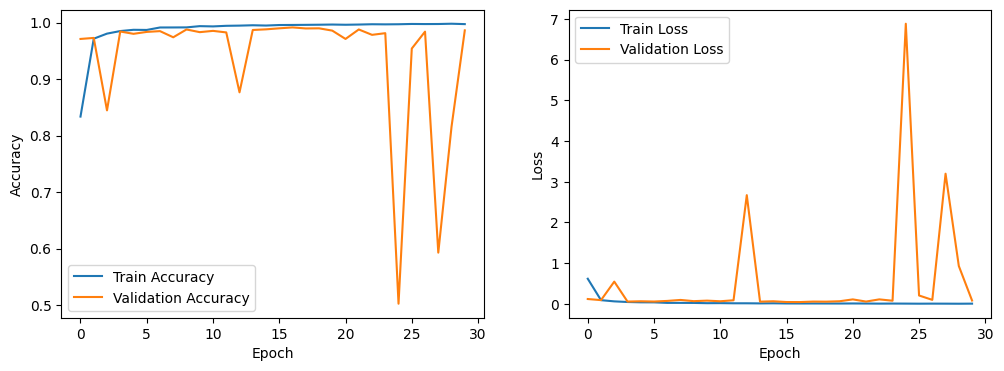

In [2]:
# Libraries used
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import os
import cv2

# Opening file for reading in binary mode
with open('/content/drive/MyDrive/Redes Neurais - Trabalho Final/data8.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

# Load training, validation, and test data
X_train = np.array(data['x_train'])
y_train = np.array(data['y_train'])
X_validation = np.array(data['x_validation'])
y_validation = np.array(data['y_validation'])
X_test = np.array(data['x_test'])
y_test = np.array(data['y_test'])

# Check the shape of the data
print("Shape of training data:", X_train.shape)
print("Shape of validation data:", X_validation.shape)
print("Shape of test data:", X_test.shape)

# Reformat the data to have the correct shape
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_validation = np.transpose(X_validation, (0, 2, 3, 1))
X_test = np.transpose(X_test, (0, 2, 3, 1))

# Check the new shape of the data
print("New shape of training data:", X_train.shape)
print("New shape of validation data:", X_validation.shape)
print("New shape of test data:", X_test.shape)

# Preprocessing the data
X_train = X_train.astype('float32') / 255.0
X_validation = X_validation.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Converting labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_validation = to_categorical(y_validation, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Defining the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_validation, y_validation))

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plotting accuracy and loss graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Libraries used
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import os
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Opening file for reading in binary mode
with open('/content/drive/MyDrive/Redes Neurais - Trabalho Final/data8.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # Dictionary type

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Printing the classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(num_classes)])
print("Classification Report:\n", class_report)

395/395 [==============================] - 2s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.96      0.99      0.98       720
           2       0.95      1.00      0.97       750
           3       0.99      0.98      0.98       450
           4       0.97      0.99      0.98       660
           5       0.95      0.92      0.94       630
           6       1.00      0.83      0.91       150
           7       0.98      0.99      0.99       450
           8       0.97      0.99      0.98       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.92      0.97      0.95       420
          12       0.99      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      0.97      0.98       270
          15       1.00      1.00      1.00       210
  

For this CNN, we can notice greater fluctuation in both the accuracy and loss curves for training and validation. During training, the loss function consistently decreases while accuracy increases, suggesting that the model is effectively learning the patterns in the training data.

We observed some ups and downs in the validation loss and validation accuracy across epochs. The validation accuracy (val_accuracy) peaks at around 98.8% in epoch 15, showing that the model is performing well on the validation data. However, there is a significant drop at epoch 13, where the validation loss (val_loss) increases considerably, which could indicate some temporary overfitting or a specific challenge with the validation data during that epoch.

The accuracy on the test set was 96.98%, which is very good and means that the model generalizes well to data it hasn't seen during training and validation.

Other validation metrics calculated for the model, such as precision, vary from 0.76 in class 27 to 1.00 in many other classes, indicating that the model is generally very accurate in its predictions. For recall, the values range from 0.68 in class 30 to 1.00 in many other classes. Most of the classes have high F1-scores, reflecting the model's overall good performance.

## 5.Transfer Learning using the Deep Convolutional Neural Network Model VGG16

VGG16 is a deep convolutional neural network model used for image classification tasks. The network consists of 16 layers of artificial neurons, each working to process image information incrementally and improve the accuracy of its predictions.

Rather than having a large number of hyperparameters, VGG16 uses convolutional layers with a 3x3 filter and a stride of 1, which are consistent with the same padding and max-pooling layers with a 2x2 filter and stride 2. It follows this arrangement of convolutional and max-pooling layers consistently throughout the architecture. At the end, it has two fully connected layers, followed by a softmax for output.

In VGG16, ‘VGG’ refers to the Visual Geometry Group at the University of Oxford, while the ‘16’ refers to the 16 layers of the network that have weights. This network is quite large, with approximately 138 million parameters. [1]

For constructing the architecture, first, any extra axes in the images are removed using np.squeeze, and if the images have only one channel, they are expanded to have an extra channel and then replicated to have three channels, which is required for VGG16, as it expects RGB input.

Using the to_categorical function, the labels are converted to the one-hot encoding format, which is necessary for multi-class classification. The VGG16 function loads the architecture with pre-trained weights from the ImageNet dataset, excluding the top part of the network, which consists of fully connected layers. Custom layers are then added to the base model. The Flatten function flattens the output activations of the base model, and Dense(1024, activation='relu') adds a fully connected layer with 1024 units and a ReLU activation function, while Dense(num_classes, activation='softmax') adds the output layer with one neuron per class and a softmax activation function for classification.

The layers of the base model are frozen so that their weights are not updated during training. This allows using the pre-trained weights without modification, focusing solely on training the added layers. The model is compiled with the Adam optimizer and the categorical_crossentropy loss function, as done in the previous CNN architectures. Training is carried out for 10 epochs with a batch size of 64.

In [ ]:
# Libraries used
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import pickle

# Load the data
with open("/content/drive/My Drive/Trabalho_redesneurais/data8.pickle",'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Assuming the loaded data has the keys 'X_train', 'y_train', 'X_test', 'y_test'
X_train = np.array(data['x_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['x_test'])
y_test = np.array(data['y_test'])

# Remove the extra axis
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

# Check if the data has the correct shape (None, 32, 32, 3)
if len(X_train.shape) == 3:
    X_train = np.expand_dims(X_train, axis=-1)
if len(X_test.shape) == 3:
    X_test = np.expand_dims(X_test, axis=-1)

# Convert to RGB (copy the single channel three times)
if X_train.shape[-1] == 1:
    X_train = np.repeat(X_train, 3, axis=-1)
if X_test.shape[-1] == 1:
    X_test = np.repeat(X_test, 3, axis=-1)

# Get the number of classes
num_classes = len(set(y_train))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Transfer Learning accuracy: {test_acc}')

58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/30
1088/1088 [==============================] - 177s 162ms/step - loss: 1.9657 - accuracy: 0.4664 - val_loss: 1.4076 - val_accuracy: 0.6043
Epoch 2/30
1088/1088 [==============================] - 176s 161ms/step - loss: 1.2434 - accuracy: 0.6456 - val_loss: 1.1176 - val_accuracy: 0.6792
Epoch 3/30
1088/1088 [==============================] - 179s 164ms/step - loss: 1.0323 - accuracy: 0.7035 - val_loss: 0.9830 - val_accuracy: 0.7156
Epoch 4/30
1088/1088 [==============================] - 179s 165ms/step - loss: 0.9076 - accuracy: 0.7372 - val_loss: 0.8833 - val_accuracy: 0.7429
Epoch 5/30
1088/1088 [==============================] - 181s 166ms/step - loss: 0.8197 - accuracy: 0.7631 - val_loss: 0.8177 - val_accuracy: 0.7618
Epoch 6/30
1088/1088 [==============================] - 184s 169ms/step - loss: 0.7521 - accuracy: 0.7818 - val_loss: 0.7613 - val_accuracy: 0.7755
Epoch 7/30
1088/1088 [=========================

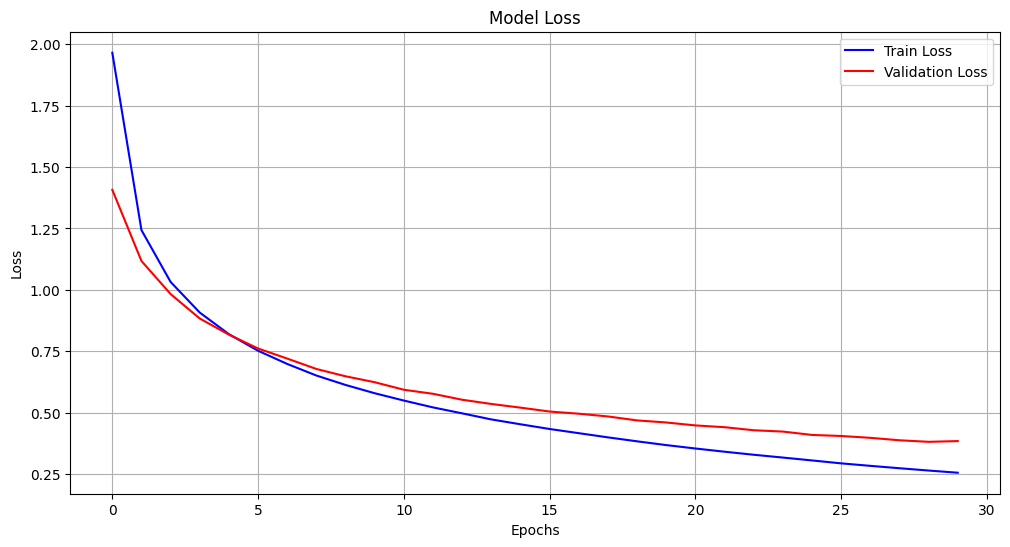

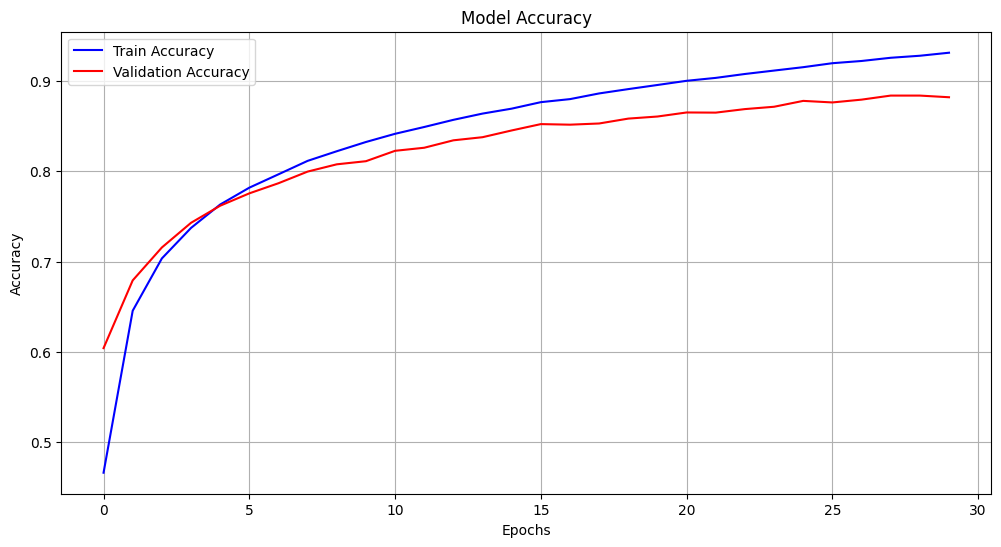

In [ ]:
import matplotlib.pyplot as plt

# Extract training and testing loss and accuracy from history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

395/395 [==============================] - 143s 360ms/step


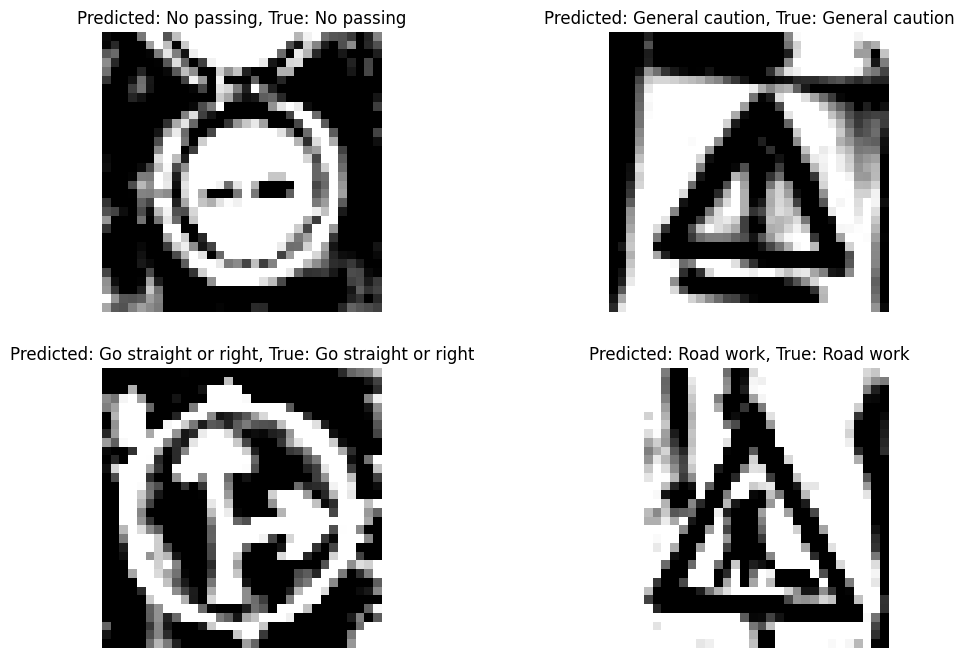

In [ ]:
import matplotlib.pyplot as plt

# Previsões dos modelos
predictions = model.predict(X_test)

# Mapping of class indices to their respective labels
class_labels = {i: label for i, label in enumerate(data['labels'])}

# Randomly selecting some images to visualize
indices = np.random.choice(len(X_test), size=4, replace=False)

# Plotting the images and their predictions
plt.figure(figsize=(12, 8))
for i, index in enumerate(indices):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_test[index])
    plt.title(f'Predicted: {class_labels[np.argmax(predictions[index])]}, True: {class_labels[np.argmax(y_test[index])]}')
    plt.axis('off')

plt.show()

We can observe the calculated Transfer Learning accuracy statistic. This value represents the model's precision when evaluated on the test set after full training. The value of approximately 58% means that, out of the test samples, 58% were correctly classified by the model. This is an indicator of the model's real performance on data that was not seen during training and validation, reflecting its moderate generalization ability, which could be due to some degree of overfitting. Training the model for more epochs might help improve generalization, but due to the high computational cost, this was not possible, as even with 10 epochs, the model took over 3 hours to run (on Colab). With more computational power, we could also attempt to adjust the hyperparameters like learning rate, batch size, or add regularization techniques to try to improve the model. Finally, we can say that the results were reasonable, but those obtained by the CNN were better.

## 6.Conclusion

This project demonstrated the implementation of multiple machine learning techniques for traffic sign classification. We compared SVM, CNNs of varying complexities, and Transfer Learning.

The SVM showed a greater variation in accuracy between the training and test sets, suggesting some tendency for overfitting. However, it is necessary to evaluate other parameters of the function, such as the regularization parameter. This test was not performed in the project, as the focus was on the application of neural networks.

We also tested a transfer learning algorithm using VGG16. In this case, the accuracy achieved was lower than that of the SVM, and in the 10th epoch, the model showed overfitting. The results showed that CNNs, especially the more complex ones, are more effective for this task due to their ability to capture complex image features.

Overall, the best method achieved was the more robust CNN, with an accuracy of approximately 97%.



## 7.References

[1] Beginner’s Guide to VGG16 Implementation in Keras. Disponível em: https://builtin.com/machine-learning/vgg16. Acessed in Jun. 12, 2024.

[2] An Introduction to Convolutional Neural Networks (CNNs). Disponível em: https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns. Acessed in Jun. 12, 2024.

[3] Traffic Signs Preprocessed. Disponível em: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data. Acessed in Jun. 15, 2024.

[4] Uma Introdução às Support Vector Machines. Disponível em: https://seer.ufrgs.br/index.php/rita/article/view/rita_v14_n2_p43-67/3543. Acessed in Jun. 15, 2024.

[5] Plot classification boundaries with different SVM Kernels. Disponível em: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py. Acessed in Jun. 15, 2024.

[6] Adam. Disponível em: https://keras.io/api/optimizers/adam/. Acessed in Jun. 15, 2024.
